# Importing the Necessary Libraries and the Iris DataSet


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
df=pd.read_csv('Iris.csv')


# Visualizing the DataSet

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
df.describe

<bound method NDFrame.describe of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-se

In [7]:
df.shape

(150, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [17]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [10]:
df.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [15]:
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

We Conclude that no Null values are present in our Data Set

In [19]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


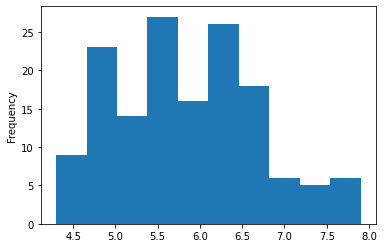

In [21]:
df['SepalLengthCm'].plot.hist()
plt.show()

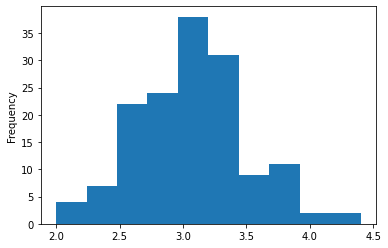

In [22]:
df['SepalWidthCm'].plot.hist()
plt.show()

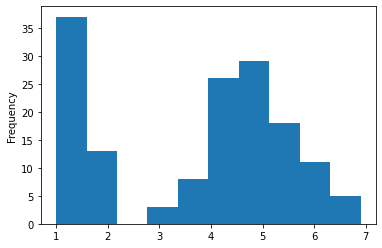

In [23]:
df['PetalLengthCm'].plot.hist()
plt.show()

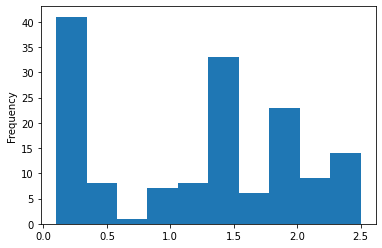

In [20]:
df['PetalWidthCm'].plot.hist()
plt.show()

# PairPlot

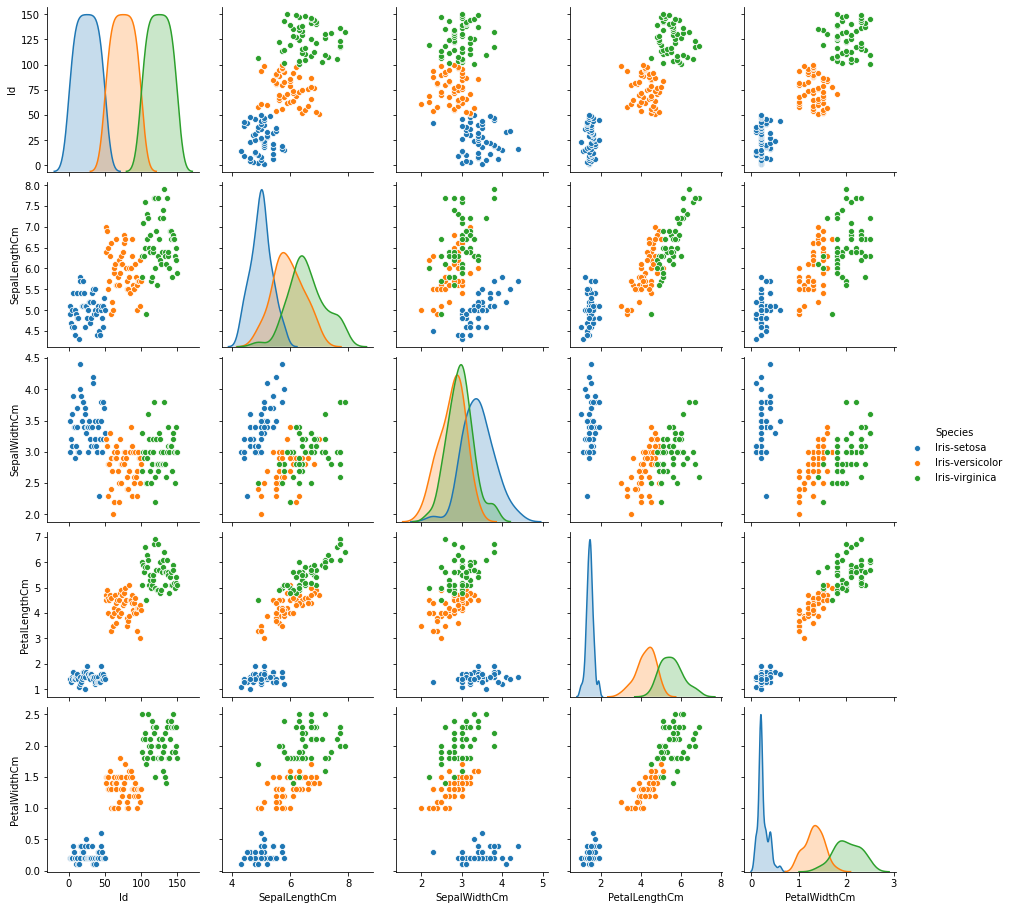

In [27]:
sns.pairplot(df, hue='Species')

# Splitting the Dataset into Train and Test

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, 
    Y,test_size=0.3, 
    random_state = 0
)

In [50]:
X_train.shape,Y_train.shape

((105, 4), (105,))

In [51]:
X_test.shape,Y_test.shape

((45, 4), (45,))

# Building the Decision Tree Model 

In [61]:
dt = DecisionTreeClassifier(criterion="gini",random_state=0)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=0)

In [62]:
dt.score(X_test, Y_test)

0.9777777777777777

# Report Analysis 

In [64]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import classification_report

In [66]:
#  Training Accuracy
ytrpred = dt.predict(X_train)
print('\n Model Training accuracy : %.4f' % (100*acc(Y_train, ytrpred)))

# Testing Accuracy
ytepred = dt.predict(X_test)
print('\n Model Testing accuracy : %.4f' % (100*acc(Y_test, ytepred)))


 Training accuracy : 100.0000

 Testing accuracy : 97.7778


# Calculating Precision,Recall and F1-Score  

In [69]:
model_precision = precision_score(Y_test, ytepred,average='weighted')
print('\n Precision Score of the Classifier is : %.4f '%(model_precision))

model_recall = recall_score(Y_test, ytepred,average='weighted')
print('\n Recall Score of the Classifier is : %.4f '%(model_recall))

model_Fscore = f1_score(Y_test, ytepred,average='weighted')
print('\n F1-Score of the Classifier is : %.4f '%(model_Fscore))


 Precision Score of the Classifier is : 0.9796 

 Recall Score of the Classifier is : 0.9778 

 F1-Score of the Classifier is : 0.9779 


# Confusion Matrix of the Model


 Confusion Matrix of the Decision Tree Classifier:


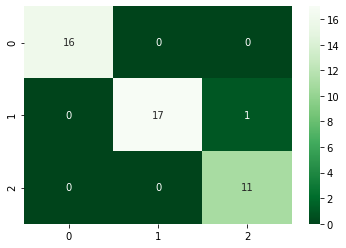

In [81]:
cm = confusion_matrix(Y_test,ytepred)
print('\n Confusion Matrix of the Decision Tree Classifier:')

sns.heatmap(cm,annot = True,cmap='Greens_r', fmt = "d")

# Classification Report for Class Wise Performance Analysis

In [82]:
print(classification_report(Y_test, ytepred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



# Decision Tree Model

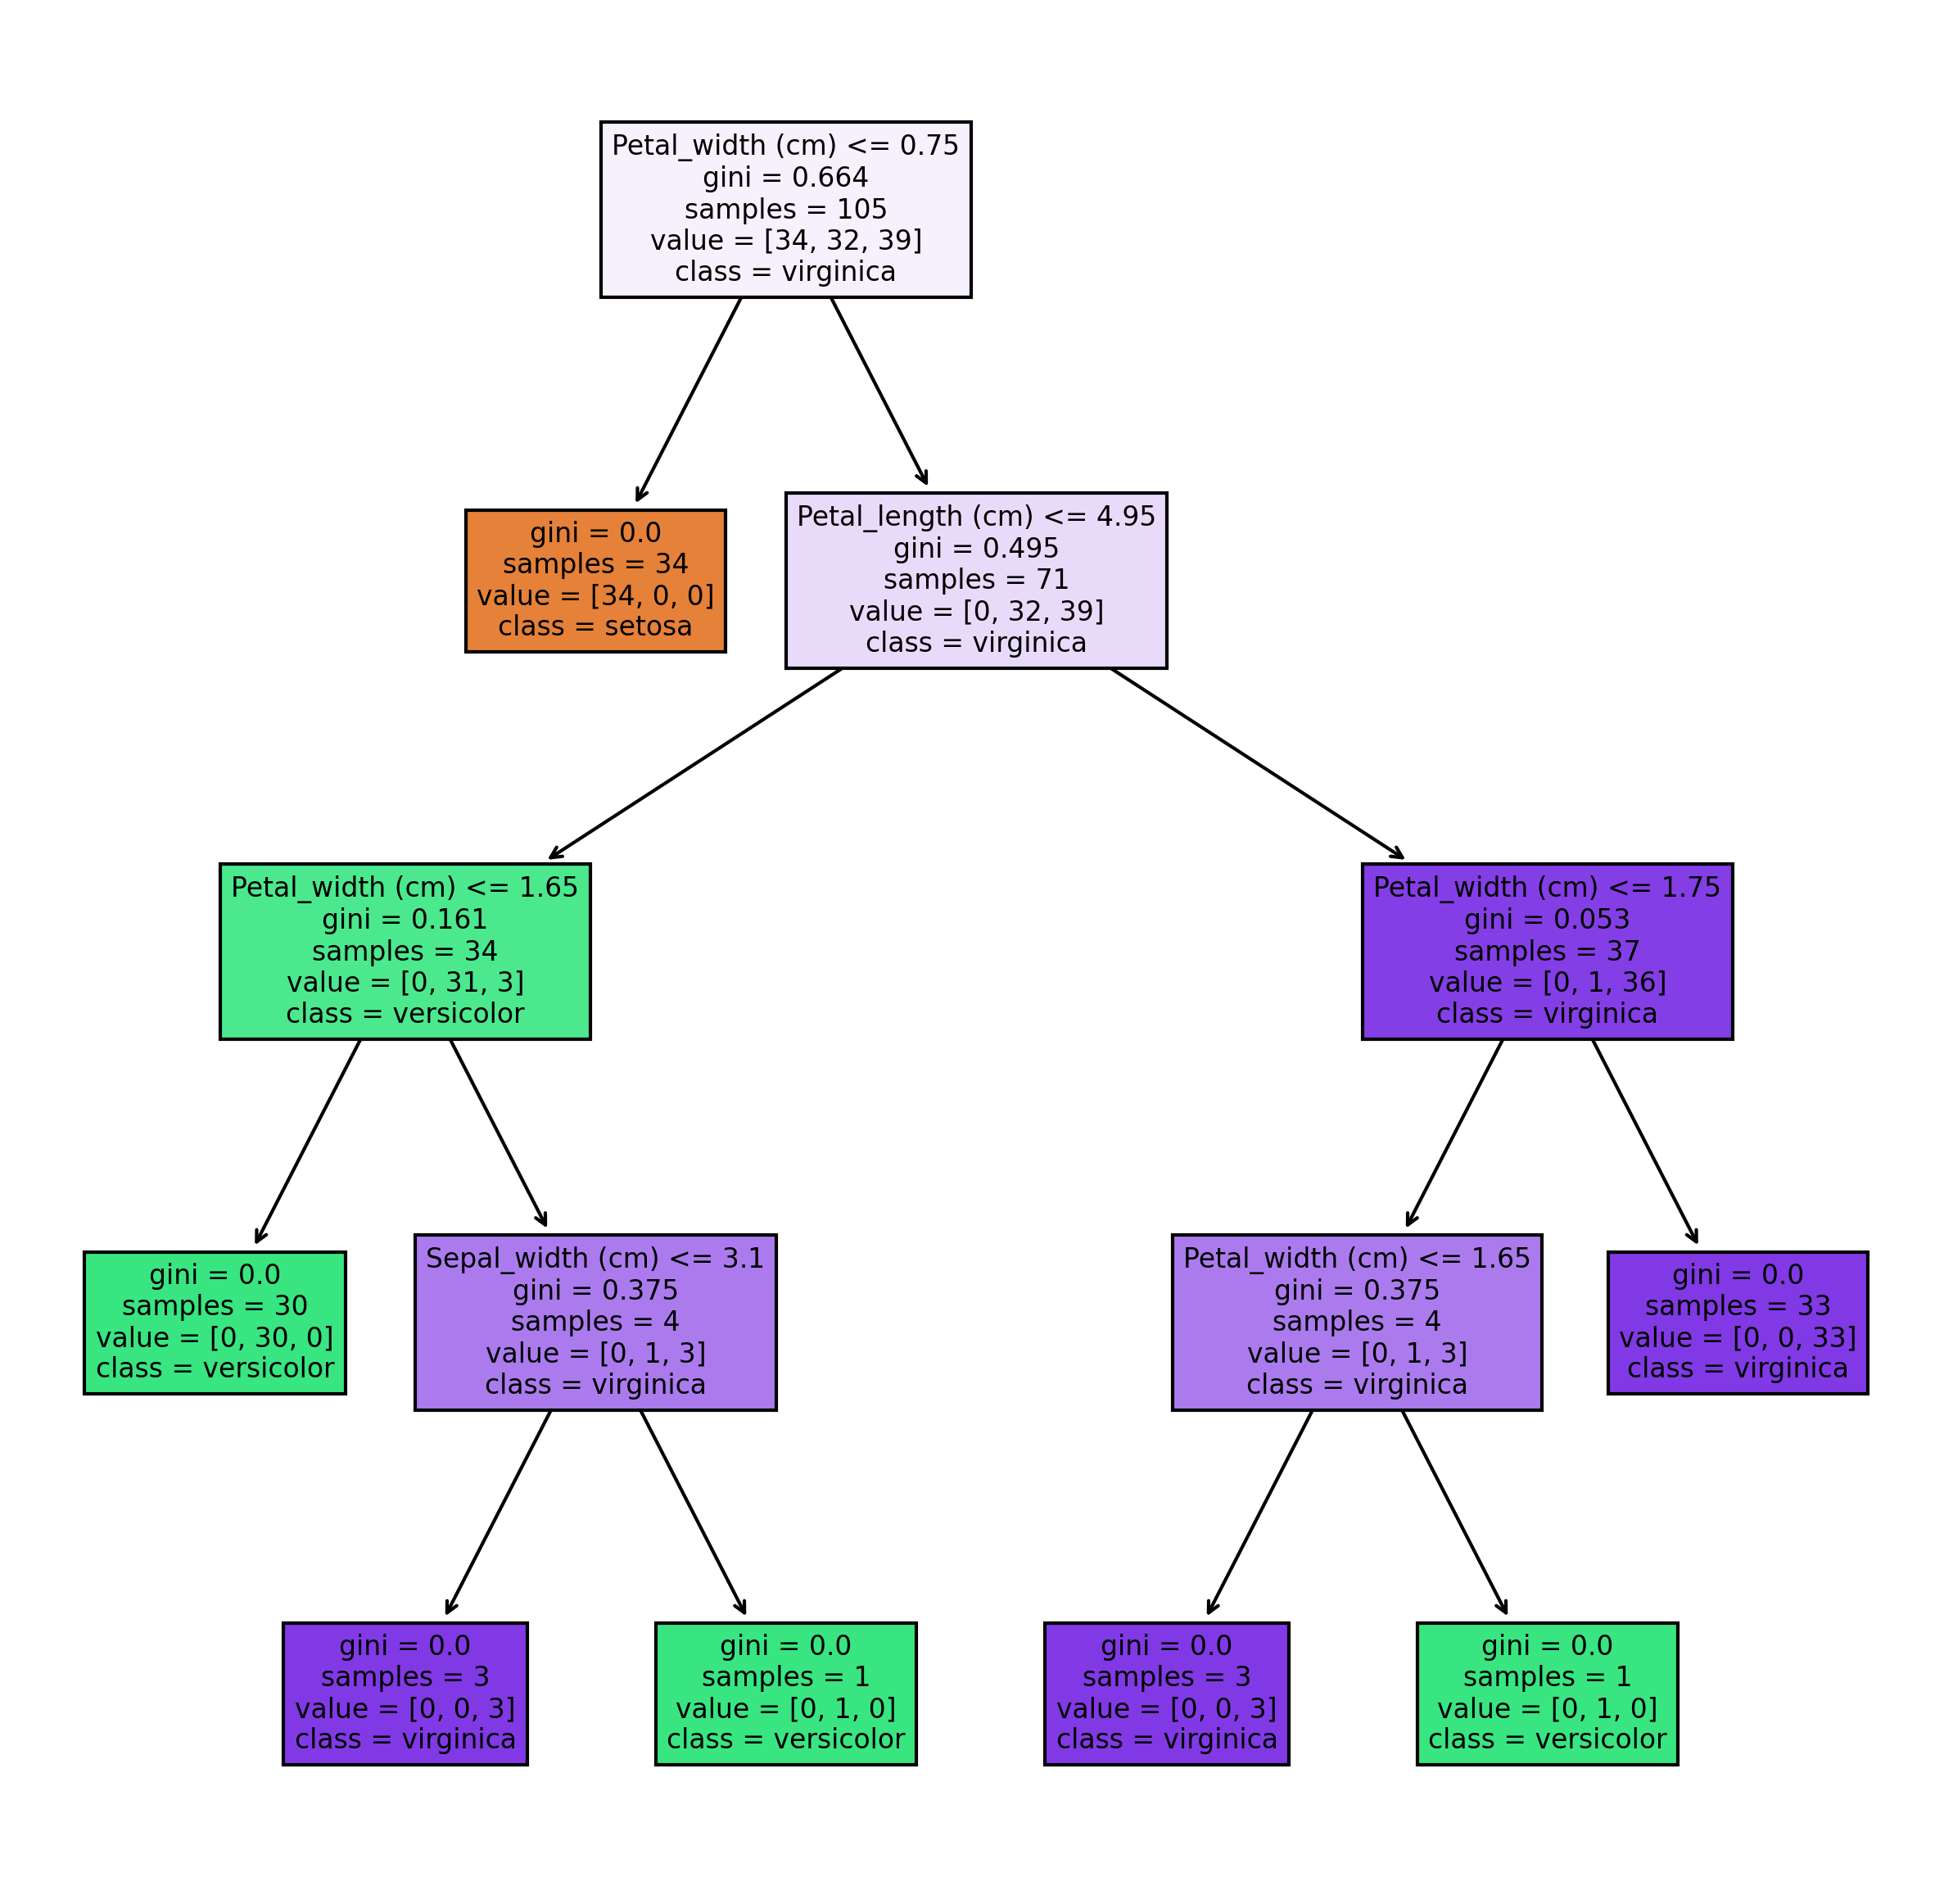

In [87]:
feature_name =['Sepal_length (cm)','Sepal_width (cm)','Petal_length (cm)','Petal_width (cm)']
class_name =['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(dt,
               feature_names = feature_name, 
               class_names=class_name,
               filled = True);
fig.savefig('DecisionTree.png')